## Data intial exploration

In [8]:
# imports

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load and preview dataset

df_global = pd.read_csv('../data/world_bank/world_bank_dataset.csv', skiprows=4)

df_global.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13.700236,13.590406,13.575697,13.859316,14.997030,14.955182,13.620217,13.367810,13.283002,NaN
2,Afghanistan,AFG,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.947000,17.310000,16.394000,15.496000,16.053000,16.395000,17.365000,17.291000,16.691000,NaN
3,Africa Western and Central,AFW,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.823074,7.968127,7.968405,8.029787,8.734041,7.722560,5.976407,5.578122,5.493947,NaN
4,Angola,AGO,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,34.482000,33.710000,32.838000,31.832000,33.067000,30.171000,28.288000,28.075000,27.943000,NaN


In [6]:
# Cleaning and reshaping the dataset

df = df_global.drop(columns=['Indicator Name', 'Indicator Code'])

df_long = df.melt(id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Youth Unemployment(%)')


# Convert 'Year' to numeric
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

# Filter out rows with NaN values in 'Youth Unemployment(%)'
df_long = df_long.dropna(subset=['Youth Unemployment(%)'])

df_long.head(15)

,Country Name,Country Code,Year,Youth Unemployment(%)
8247,Africa Eastern and Southern,AFE,1991.0,15.358171
8248,Afghanistan,AFG,1991.0,10.312000
8249,Africa Western and Central,AFW,1991.0,7.481249
8250,Angola,AGO,1991.0,39.921000
8251,Albania,ALB,1991.0,15.974000
8253,Arab World,ARB,1991.0,24.797314
8254,United Arab Emirates,ARE,1991.0,3.912000
8255,Argentina,ARG,1991.0,11.633000
8256,Armenia,ARM,1991.0,1.967000
8259,Australia,AUS,1991.0,17.476000


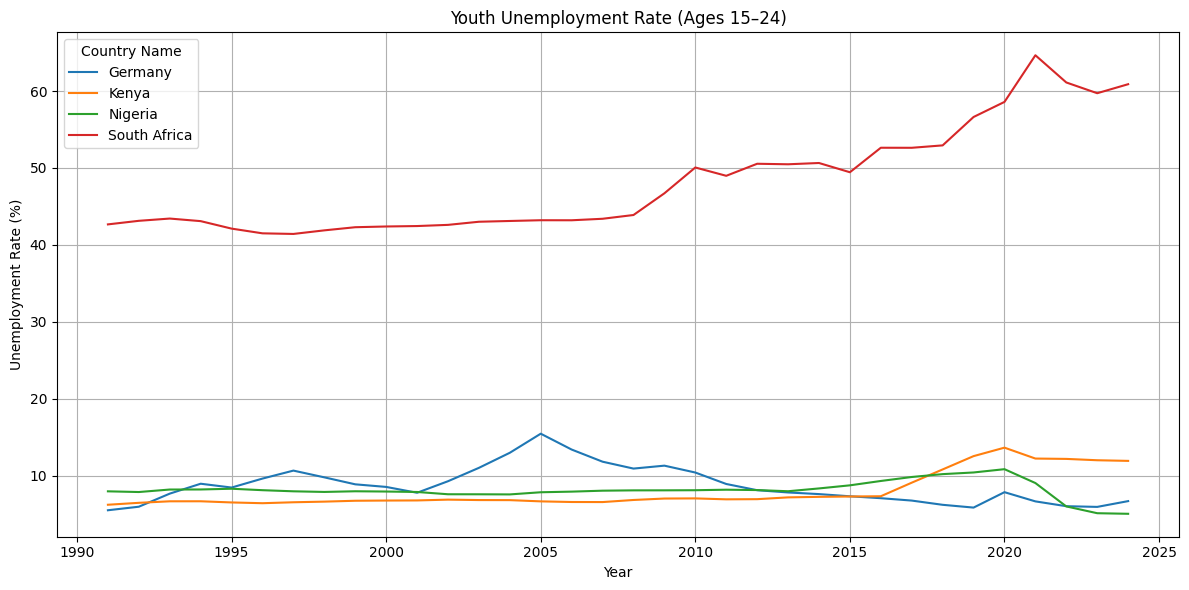

In [10]:
selected_countries = ['South Africa', 'Nigeria', 'Kenya', 'Germany']

df_selected = df_long[df_long['Country Name'].isin(selected_countries)]


plt.figure(figsize=(12,6))
sns.lineplot(data=df_selected, x='Year', y='Youth Unemployment(%)', hue='Country Name')
plt.title('Youth Unemployment Rate (Ages 15–24)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
